# Tutorial: SQL, Google Colab e Jupyter Notebooks


O presente tutorial tem o objetivo de apresentar de forma prática a aplicação da linguagem SQL para extrair as informações de um banco de dados relacional. 

Para tal, utilizaremos a ferramenta [Colab](https://www.youtube.com/watch?v=inN8seMm7UI), da Google. Ela permite a criação de "documentos executáveis" através de [Jupyter Notebooks](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html), que podem ser salvos e compartilhados via [Google Drive](https://pt.wikipedia.org/wiki/Google_Drive).

Um notebook Jupyter permite a execução de códigos [Python](https://docs.python.org/pt-br/3/tutorial/index.html) de forma interativa, além da composição de textos formatados e visualização de imagens e vídeos.

Para executar as células de um notebook via Colab, você deverá ter uma conta na Google. Se não tiver, pode criar uma seguindo [esse tutorial](https://support.google.com/accounts/answer/27441?hl=pt-BR).

Utilizaremos as bibliotecas [`sqlite3`](https://docs.python.org/pt-br/3/library/sqlite3.html) e [`pandas`](https://pandas.pydata.org/) em nossos exemplos.

---

Tópicos do tutorial:
0. Notebooks Colab
1. Python
2. Pandas
3. SQL com `sqlite3`

## 0. Notebooks Colab

# *`New section`*

In [ ]:
print('hello world')

hello world


# 1. Python

Se desejar mais informações sobre Python e Colab, veja a seguinte playlist no Youtube: [Curso rápido de Python para iniciantes com Google Colab](https://www.youtube.com/playlist?list=PLCAhGm8nJ9CDV30W-0q8K4xzmGHIXnW6h)

In [ ]:
# declaring variables
var_str = 'Lorem ipsum dolor sit amet, ...'
var_int = 42
var_float = 3.14
var_bool = False
var_list = [1, 2, 'a']
var_dict = {'key_1': 'value', 'key_2': 1}

formatted_str_with_variables = f'{var_str} | {var_int} | {var_float} | {var_bool}'

In [ ]:
# printing multiple types of variables
print(formatted_str_with_variables)
print(var_str)
print(var_int)
print(var_float)
print(var_list)
print(var_dict)

Lorem ipsum dolor sit amet, ... | 42 | 3.14 | False
Lorem ipsum dolor sit amet, ...
42
3.14
[1, 2, 'a']
{'key_1': 'value', 'key_2': 1}


In [ ]:
# nice single line comment

""" 
nice 
multiline 
comment
"""

' \nnice \nmultiline \ncomment\n'

In [ ]:
# nice conditions
if var_bool:
  print(' :D ')
else:
  print(' :) ')

In [ ]:
# iterating list
for element in var_list:
  print(element)

1
2
a


In [ ]:
# iterating dict
for k,v in var_dict.items():
  print(k,v)

key_1 value
key_2 1


# 2. Pandas

Pandas é uma biblioteca Python open source que fornece estruturas de dados de alto desempenho e fáceis de usar para processamento e análise de dados.

- [Features principais do Pandas em 10 minutos](https://pandas.pydata.org/docs/user_guide/10min.html)
- [Documentação](http://pandas.pydata.org/pandas-docs/stable/)
- [Tutoriais](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html) 

In [ ]:
import pandas as pd

## 2.1. Importando um dataframe a partir de um arquivo¶

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/filipefbn/jupyter_intro_class_ibd/master/data/music_data.csv")
df.head()

,id_billboard,song_name,artist,lyrics,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,time,type,id,track_href,analysis_url,duration_ms,time_signature
0,71,Sorry - Originally performed by Beyonce,2016 Dynamo Hitz,NaN,0.699,0.526,2,-13.514,1,0.0373,0.00101,0.001650,0.1930,0.148,129.980,audio_features,5rzLBhiS7SJy03ZfcTpUSy,https://api.spotify.com/v1/tracks/5rzLBhiS7SJy...,https://api.spotify.com/v1/audio-analysis/5rzL...,232934,4
1,7,Hello,Adele,"Hello, it's me I was wondering if after all th...",0.481,0.451,5,-6.095,0,0.0347,0.33600,0.000000,0.0872,0.287,157.966,audio_features,4sPmO7WMQUAf45kwMOtONw,https://api.spotify.com/v1/tracks/4sPmO7WMQUAf...,https://api.spotify.com/v1/audio-analysis/4sPm...,295493,4
2,26,Send My Love (To Your New Lover),Adele,"Just the guitar. OK, cool. This was all you, n...",0.690,0.524,6,-8.390,0,0.1030,0.04150,0.000003,0.1700,0.561,164.023,audio_features,4BHzQ9C00ceJxfG16AlNWb,https://api.spotify.com/v1/tracks/4BHzQ9C00ceJ...,https://api.spotify.com/v1/audio-analysis/4BHz...,223080,4
3,83,When We Were Young,Adele,NaN,0.381,0.594,3,-5.970,1,0.0486,0.34800,0.000000,0.0925,0.275,143.860,audio_features,7IWkJwX9C0J7tHurTD7ViL,https://api.spotify.com/v1/tracks/7IWkJwX9C0J7...,https://api.spotify.com/v1/audio-analysis/7IWk...,290907,4
4,39,Here,Alessia Cara,NaN,0.376,0.810,0,-4.003,1,0.1660,0.08440,0.000000,0.0730,0.334,123.909,audio_features,664gdARxaClFsoF5SXKOws,https://api.spotify.com/v1/tracks/664gdARxaClF...,https://api.spotify.com/v1/audio-analysis/664g...,199453,4


In [ ]:
df.columns

Index(['id_billboard', 'song_name', 'artist', 'lyrics', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'time', 'type', 'id',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [ ]:
df[['danceability', 'energy', 'loudness']].describe()

,danceability,energy,loudness
count,60.000000,60.000000,60.00000
mean,0.659200,0.644883,-6.19370
std,0.132919,0.154437,2.39571
min,0.376000,0.275000,-13.51400
25%,0.573250,0.558000,-7.53325
50%,0.655500,0.670500,-5.72650
75%,0.758250,0.761000,-4.66275
max,0.916000,0.928000,-2.78700


## 2.2. Acesso a colunas do dataframe

In [ ]:
df['artist'].sample(n=5)

6       Ariana Grande
14           Coldplay
46            Jeremih
30    DRAM Lil Yachty
53        Kevin Gates
Name: artist, dtype: object

In [ ]:
df[['song_name', 'artist', 'duration_ms']].sample(n=5)

,song_name,artist,duration_ms
35,All In My Head (Flex),Fifth Harmony Fetty Wap,210573
14,Adventure Of A Lifetime,Coldplay,263787
29,One Dance,Drake WizKid Kyla,173987
34,679 (feat. Remy Boyz),Fetty Wap Remy Boyz,196693
40,Wicked,Future,173347


## 2.3. Acesso a linhas do dataframe

In [ ]:
df.loc[42]

id_billboard                                                       19
song_name                                              Me, Myself & I
artist                                              G-Eazy Bebe Rexha
lyrics              [Bebe Rexha (G-Eazy):] Oh, it's just me, mysel...
danceability                                                    0.757
energy                                                          0.672
key                                                                 0
loudness                                                       -6.524
mode                                                                0
speechiness                                                    0.0955
acousticness                                                   0.0186
instrumentalness                                                    0
liveness                                                        0.158
valence                                                         0.389
time                

In [ ]:
df.loc[42:44]

,id_billboard,song_name,artist,lyrics,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,time,type,id,track_href,analysis_url,duration_ms,time_signature
42,19,"Me, Myself & I",G-Eazy Bebe Rexha,"[Bebe Rexha (G-Eazy):] Oh, it's just me, mysel...",0.757,0.672,0,-6.524,0,0.0955,0.0186,0.0,0.158,0.389,111.996,audio_features,40YcuQysJ0KlGQTeGUosTC,https://api.spotify.com/v1/tracks/40YcuQysJ0Kl...,https://api.spotify.com/v1/audio-analysis/40Yc...,251467,4
43,38,"i hate u, i love u (feat. olivia o'brien)",gnash Olivia O'Brien,[Olivia O'Brien:] Feeling used But I'm still m...,0.492,0.275,6,-13.400,0,0.3000,0.6870,0.0,0.101,0.180,92.600,audio_features,7vRriwrloYVaoAe3a9wJHe,https://api.spotify.com/v1/tracks/7vRriwrloYVa...,https://api.spotify.com/v1/audio-analysis/7vRr...,251034,4
44,94,Starving,Hailee Steinfeld Grey Zedd,NaN,0.724,0.628,4,-4.219,1,0.0962,0.4090,0.0,0.105,0.508,99.898,audio_features,2zDt2TfQbxiSPjTVJTgbwz,https://api.spotify.com/v1/tracks/2zDt2TfQbxiS...,https://api.spotify.com/v1/audio-analysis/2zDt...,181880,4


## 2.4. Aplicando uma função à uma coluna

In [ ]:
def to_upper(s):
  return s.upper()

df['lyrics'] = df['lyrics'].astype('str')
df['lyrics'].apply(to_upper)

0                                                   NAN
1     HELLO, IT'S ME I WAS WONDERING IF AFTER ALL TH...
2     JUST THE GUITAR. OK, COOL. THIS WAS ALL YOU, N...
3                                                   NAN
4                                                   NAN
5     OH, YEAH DON'T NEED PERMISSION MADE MY DECISIO...
6     I'M SO INTO YOU, I CAN BARELY BREATHE AND ALL ...
7                                                   NAN
8     DON'T DON'T PLAY WITH HER, DON'T BE DISHONEST ...
9                                                   NAN
10    BABY, THIS IS WHAT YOU CAME FOR LIGHTNING STRI...
11                                                  NAN
12    [CHARLIE PUTH:] WE DON'T TALK ANYMORE WE DON'T...
13                                                  NAN
14                                                  NAN
15                                                  NAN
16                                                  NAN
17                                              

## 2.5. Acessando linhas a partir de consulta com sintaxe própria da biblioteca

In [ ]:
# SELECT * WHERE song_name = 'Here'
df[df['song_name'] == 'Here']

,id_billboard,song_name,artist,lyrics,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,time,type,id,track_href,analysis_url,duration_ms,time_signature
4,39,Here,Alessia Cara,nan,0.376,0.81,0,-4.003,1,0.166,0.0844,0.0,0.073,0.334,123.909,audio_features,664gdARxaClFsoF5SXKOws,https://api.spotify.com/v1/tracks/664gdARxaClF...,https://api.spotify.com/v1/audio-analysis/664g...,199453,4


# 3. SQL com `sqlite3`

SQLite é uma engine de banco de dados transacional autocontida que dispensa servidor e configuração. Através dela é possível importar um dump de banco de dados a partir de um arquivo `.sql`, realizar consultas e outras operações.

- [SQLite](https://www.sqlite.org/index.html)
- [Documentação da biblioteca `sqlite` em Python](https://docs.python.org/pt-br/3/library/sqlite3.html)
- [Tutoriais](https://www.tutorialspoint.com/sqlite/sqlite_python.htm)

Para os exemplos, utilizaremos o seguinte banco representado pelo schema abaixo:



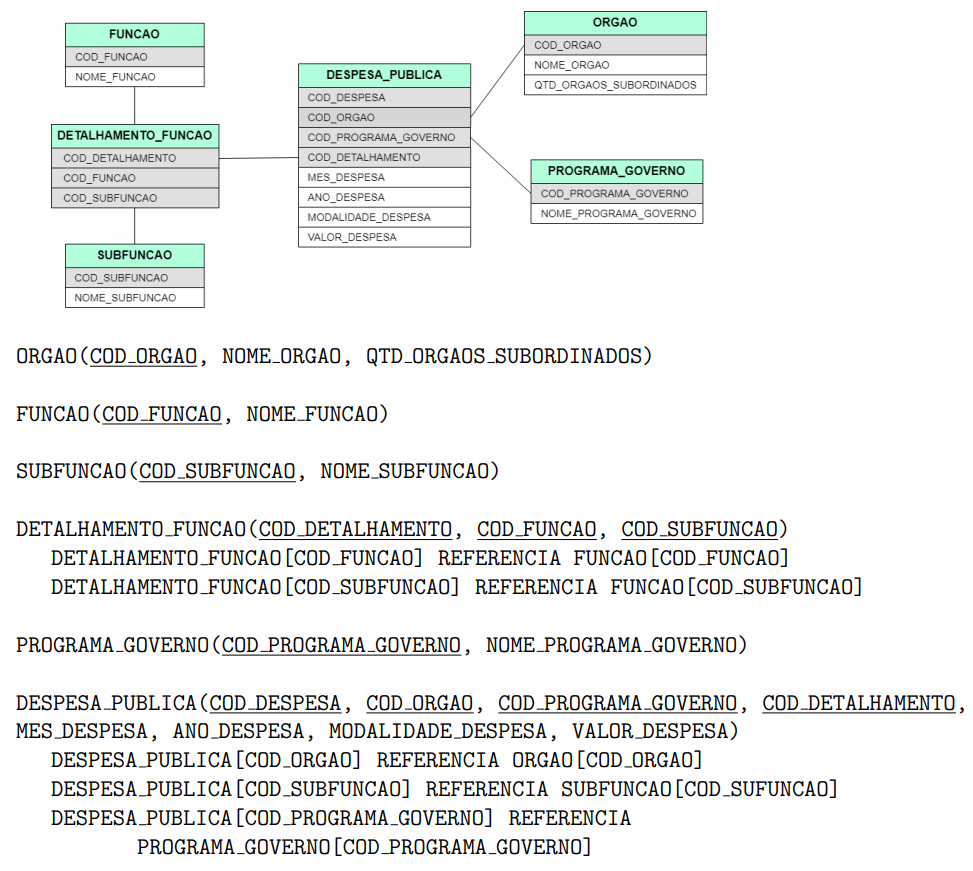


In [ ]:
import io
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Download do dump:
!wget --quiet -P /tmp/ibd/ https://raw.githubusercontent.com/filipefbn/jupyter_intro_class_ibd/master/data/despesas_publicas_tp1.sql

## 3.1. Criação da conexão com o banco
No momento da conexão, é informado o nome do arquivo onde será montado o banco de dados. No nosso caso, este arquivo não precisa ser pré-existente, porque iremos carregar as informações de um dump

Se este comando for executado com um arquivo que já existe e possui as mesmas tabelas que serão criadas, ocorrerá um erro no momento da execução do script mais à frente

In [ ]:
conn = sqlite3.connect('/tmp/ibd/conn_despesas_publicas_tp1.db')
cursor = conn.cursor()

## 3.2. Execução do script para carga do dump

Criada a conexão, iremos utilizar o arquivo .sql disponibilizado para recuperar o schema e os dados do banco.

In [ ]:
f = io.open('/tmp/ibd/despesas_publicas_tp1.sql', 'r', encoding='ISO-8859-1')
sql = f.read()
cursor.executescript(sql)


## 3.3. Realizando consultas no banco de dados

Criada a conexão e realizada a carga dos dados no banco, pode ser executada qualquer consulta SQL.

O SQLite3 permite que o retorno dos dados seja feito em vários formatos. Utilizaremos o retorno em um dataframe Pandas.

### 3.3.1. Consulta 1
Retorne todos os órgãos ordenados de forma decrescente pela quantidade de orgãos subordinados.

In [ ]:
query = """
SELECT * FROM ORGAO ORDER BY QTD_ORGAOS_SUBORDINADOS DESC
"""

df = pd.read_sql_query(query, conn)
df

,COD_ORGAO,NOME_ORGAO,QTD_ORGAOS_SUBORDINADOS
0,26000,Ministério da Educação,104
1,30000,Ministério da Justiça e Segurança Pública,6
2,22000,"Ministério da Agricultura, Pecuária e Abastec",5
3,24000,"Ministério da Ciência, Tecnologia, Inovações",4
4,52000,Ministério da Defesa,4
5,53000,Ministério da Integração Nacional,4
6,25000,Ministério da Fazenda,3
7,36000,Ministério da Saúde,3
8,20000,Presidência da República,2
9,39000,"Ministério dos Transportes, Portos e Aviação",2


### 3.3.2. Consulta 2
Retorne todos os nomes dos programas de governo e a soma de suas despesas totais no ano de 2018, ordenadas de forma decrescete, desde que as despesas tenham sido superiores a 0.

In [ ]:
query = """
SELECT 
  P.NOME_PROGRAMA_GOVERNO, SUM(D.VALOR_DESPESA) AS VALOR_DESPESA
FROM 
  DESPESA_PUBLICA AS D
INNER JOIN PROGRAMA_GOVERNO AS P
  ON D.COD_PROGRAMA_GOVERNO = P.COD_PROGRAMA_GOVERNO
GROUP BY 
  P.NOME_PROGRAMA_GOVERNO
HAVING 
  SUM(VALOR_DESPESA) > 0
ORDER BY 
  VALOR_DESPESA DESC
"""

df = pd.read_sql_query(query, conn)
df

,NOME_PROGRAMA_GOVERNO,VALOR_DESPESA
0,BRASIL SEM MISERIA,387175.60
1,ENEM,334262.06
2,PRONATEC,60262.46
3,CONTROLE DO CANCER,38971.19
4,MAIS MEDICOS,14400.00
5,REGULARIZACAO FUNDIARIA,1497.26
6,REDE CEGONHA,1210.00


### 3.3.3. Consulta 3
Retorne todos os gastos totais por mês em despesas públicas com função de 'Educação', ordenadas pelos meses do ano.

In [ ]:
query = """
SELECT 
  D.MES_DESPESA, SUM(D.VALOR_DESPESA) AS VALOR_DESPESA
FROM 
  DESPESA_PUBLICA AS D
INNER JOIN DETALHAMENTO_FUNCAO AS DF
  ON D.COD_DETALHAMENTO = DF.COD_DETALHAMENTO
INNER JOIN FUNCAO AS F
  ON DF.COD_FUNCAO = F.COD_FUNCAO
WHERE 
  F.NOME_FUNCAO = 'Educação'
GROUP BY 
  D.MES_DESPESA
ORDER BY 
  D.MES_DESPESA
"""


df = pd.read_sql_query(query, conn)
df

,MES_DESPESA,VALOR_DESPESA
0,1,7000.00
1,2,0.00
2,3,0.00
3,4,18178.00
4,5,28073.08
5,6,135.36
6,7,0.00
7,8,3126.00
8,9,334126.70
9,10,385.38


### 3.3.4. Fechamento da conexão com o banco

Após serem realizadas todas as consultas necessárias, é recomendado encerrar formalmente a conexão com o banco de dados

In [ ]:
conn.close()